In [1]:
!pip -q install langchain huggingface_hub openai google-search-results tiktoken chromadb lark

# Different Rag Approaches

## 1. Self querying Retriever

`About`

A self-querying retriever is one that, as the name suggests, has the ability to query itself. Specifically, given any natural language query, the retriever uses a query-constructing LLM chain to write a structured query and then applies that structured query to its underlying VectorStore. This allows the retriever to not only use the user-input query for semantic similarity comparison with the contents of stored documents but to also extract filters from the user query on the metadata of stored documents and to execute those filters.

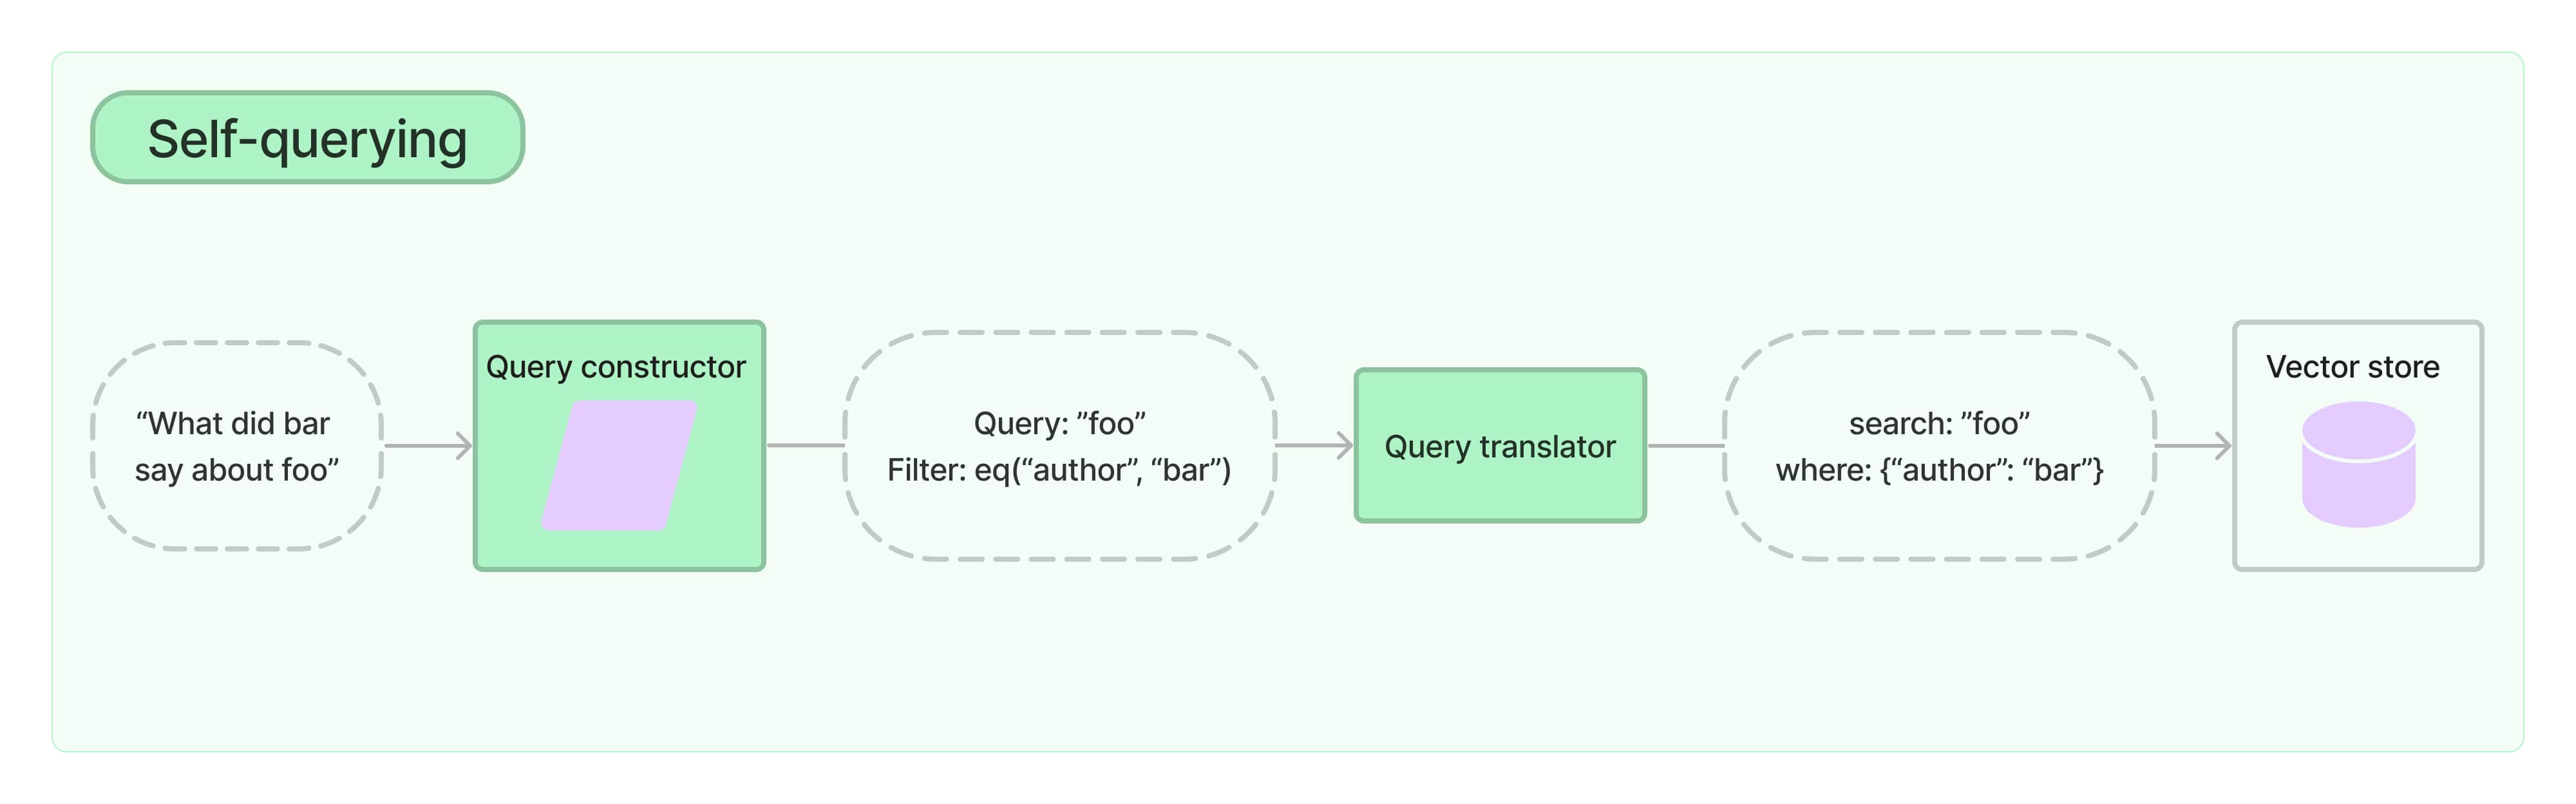

`Resources`

1.1. https://www.youtube.com/watch?v=f4LeWlt3T8Y&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY

1.2. https://colab.research.google.com/drive/1MEVagsVRce15lzd_KNb86oAJmQx_WyZp?usp=sharing

1.3 https://github.com/langchain-ai/langchain/blob/master/cookbook/self_query_hotel_search.ipynb

2. https://github.com/myscale/ChatData/blob/main/docs/self-query.md


`summary`

1. Semantic search should only be used where necessary.
2. Leverage metadata for more effective retrieval augmented generation systems.
3. Lets say the query is something like what are the movie released in 2000 or what items can i get below 500, in such queries semantic aspect is not required. Rather a filter on the database is required.
4. So this retriever takes in the user query , converts it into format which has query which needs semantic retrieval if applicable and filters if applicable.

## 2. Parent Document Retriever  


`About`

When splitting documents for retrieval, there is a balance between having small chunks for accurate embeddings and retaining context with larger chunks. The ParentDocumentRetriever addresses this by storing small data chunks. During retrieval, it fetches these small chunks first and then retrieves the larger parent documents they originated from, which can be the whole document or a larger chunk. This method maintains the context while ensuring accurate embeddings.

`Resources`

1. https://www.youtube.com/watch?v=wQEl0GGxPcM&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY&index=3
2. https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/parent_document_retriever/
3. https://colab.research.google.com/drive/17kVVuaT-pEO0zWHaqsNiQLaTqtZefRTF?usp=sharing

## 3. Hybrid Search - Enseble Retrievers


`About`

The EnsembleRetriever combines results from multiple retrievers and reranks them using the Reciprocal Rank Fusion algorithm, improving performance by leveraging the strengths of different algorithms. Typically, it combines a sparse retriever (e.g., BM25) with a dense retriever (e.g., embedding similarity) in a "hybrid search." Sparse retrievers excel in keyword-based relevance, while dense retrievers are effective in semantic similarity, making their combination particularly powerful.

`Resources`
1. https://www.youtube.com/watch?v=lYxGYXjfrNI&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY&index=4
2. https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/ensemble/
3. https://colab.research.google.com/drive/1lsT1V_U1Gq-jv09wv0ok5QHdyRjJyNxm?usp=sharing

`Check`
 Have to check if there are any disadvantages of combining multiple retrievers 

## 4. Contextual Compression and Filtering
explore more about pipelines , filters etc- the best so far



`About`
Not everything a retriever retrieves would be relevant. SO we can use Contextual Compressors/ Filters to clean up the retrieved stuff. This can be done by an LLM, This LLM can also be fine tuned for this task to get more promising results. 

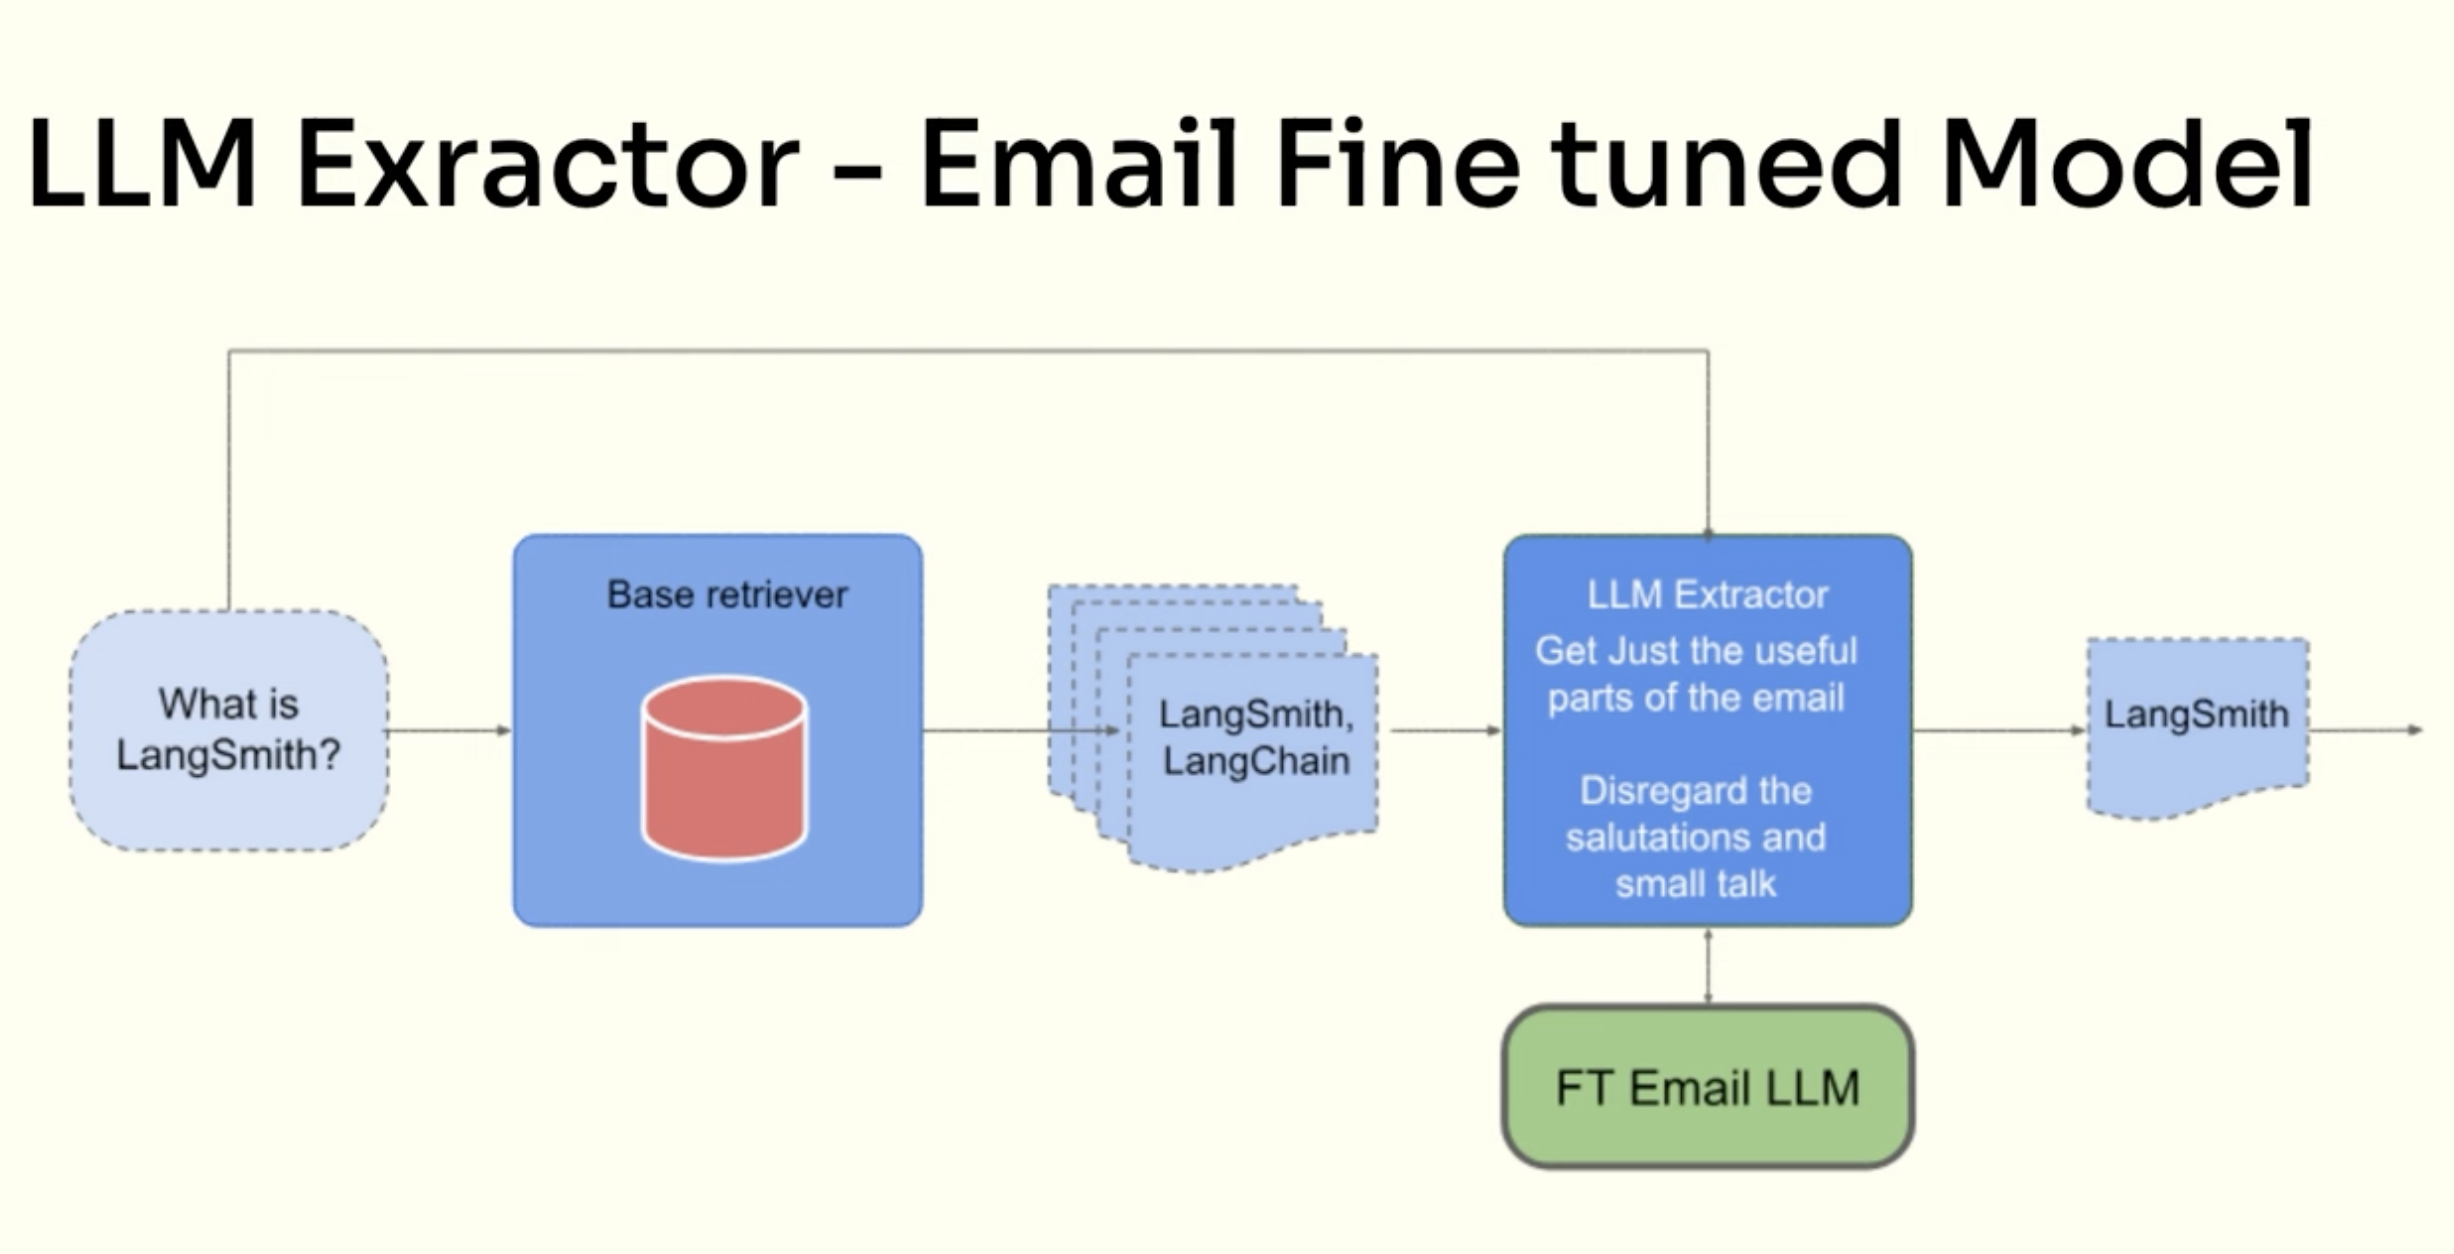

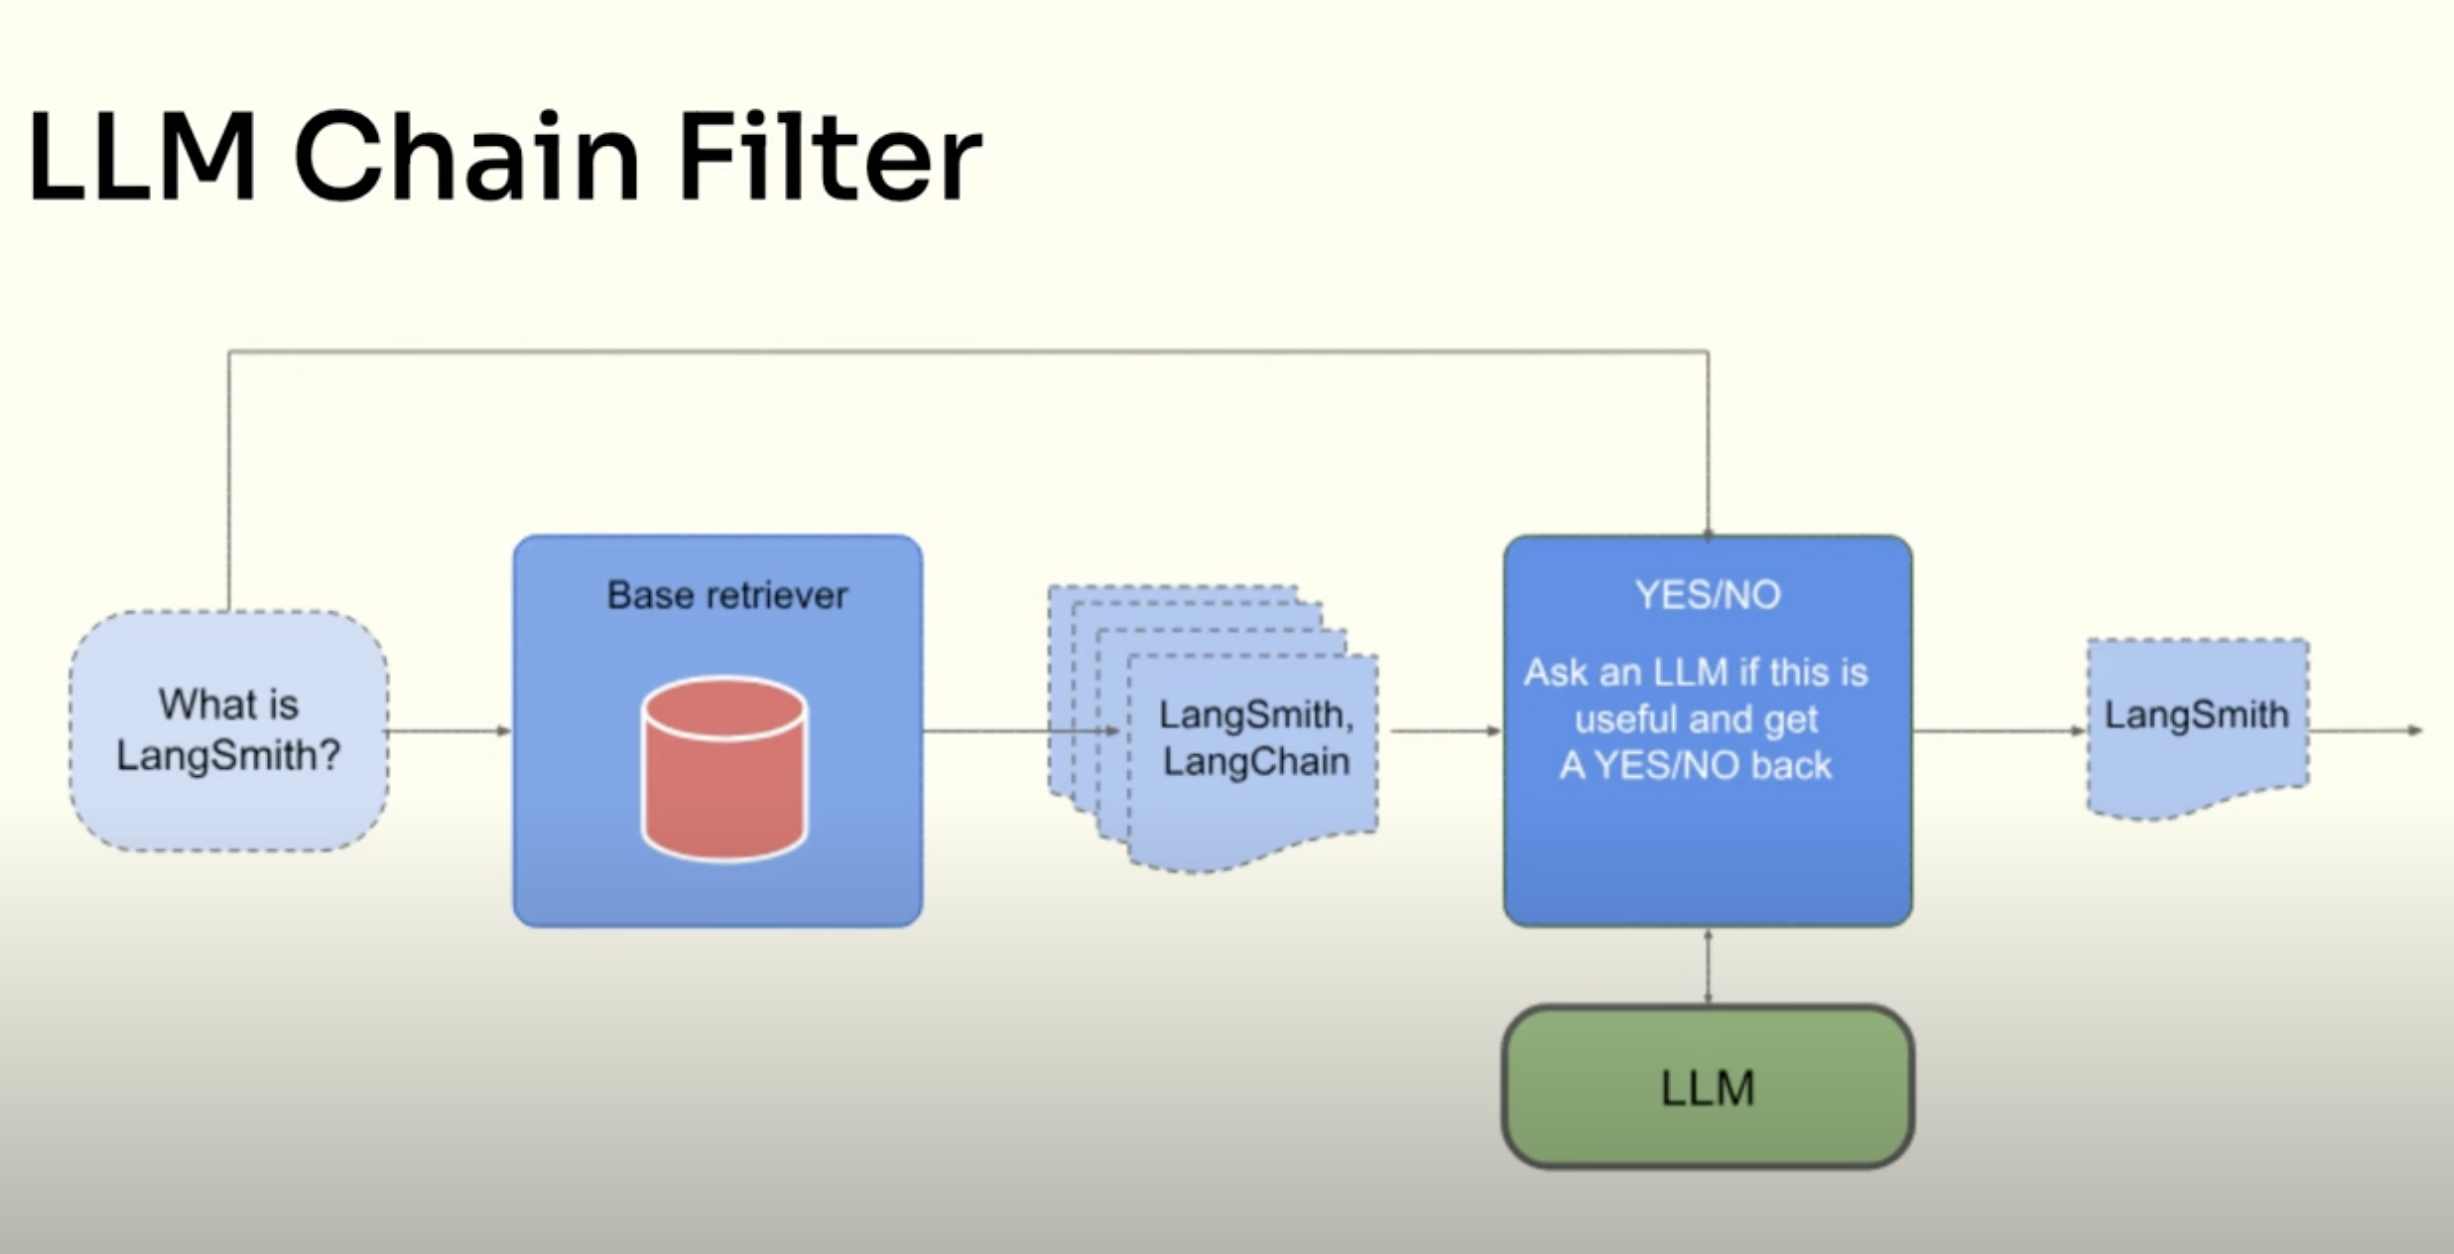 

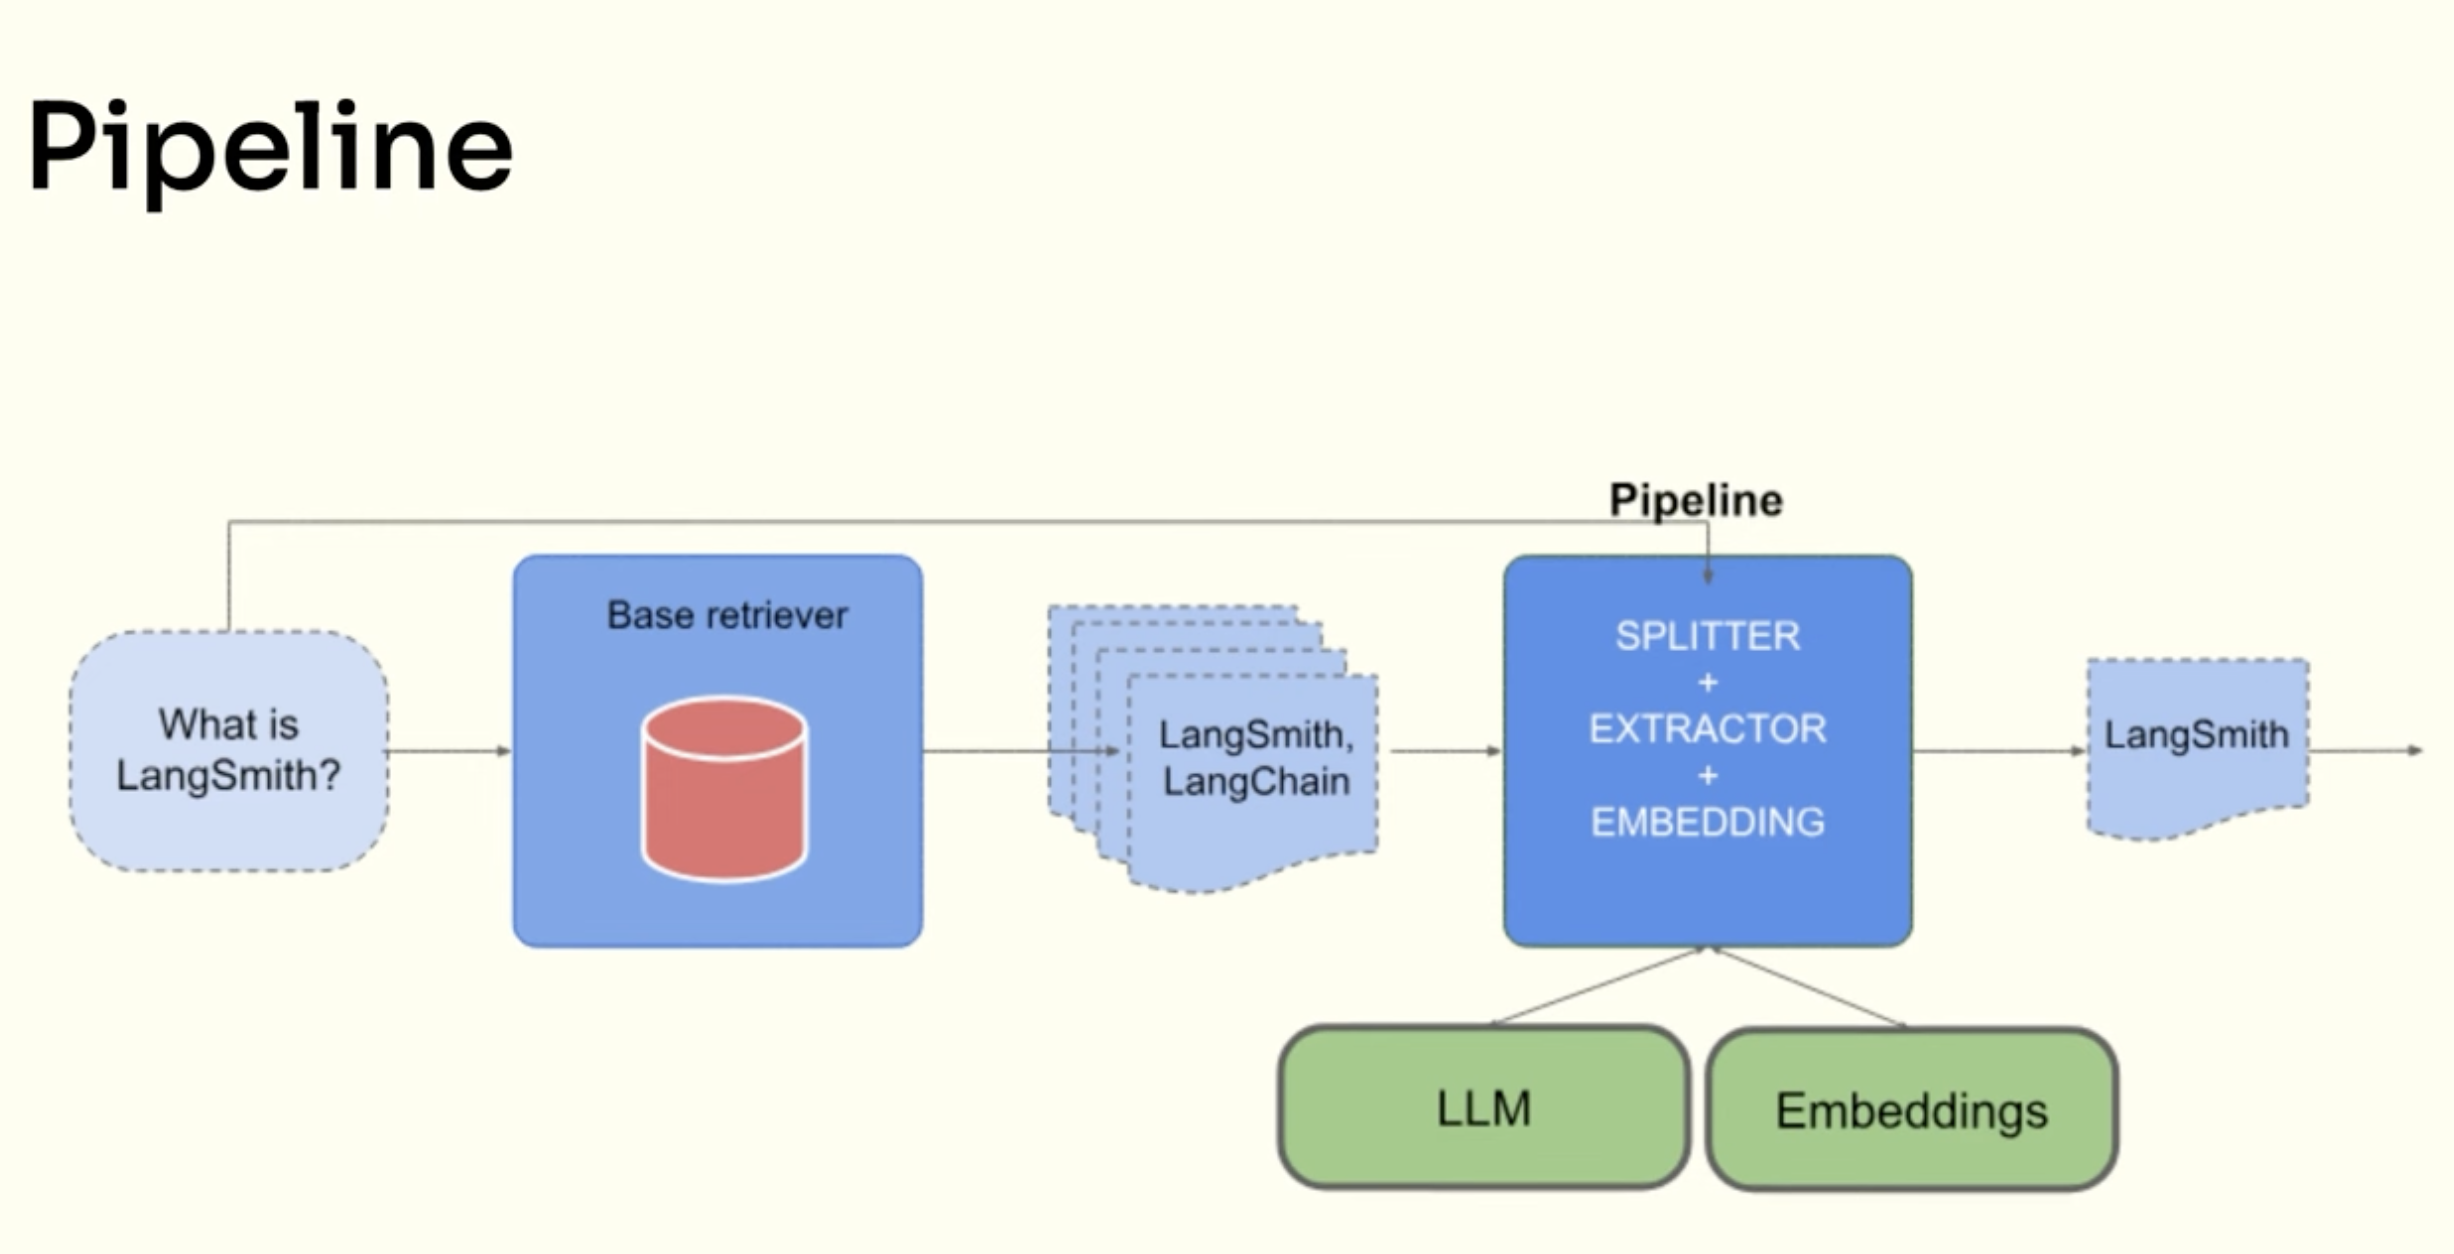
finally we can take an embedding to see how many of the final ones are still close to the query 

Ppl have fine tuned a model for extracting information out of emails. So it ignores text like hwllo, hope your fine etc and keeps only the actual relevant body.  

1. https://www.youtube.com/watch?v=4sRigbRITF0&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY&index=4
2. https://colab.research.google.com/drive/1q6ejIWrorckUdkLrLsHl9PnVQhXWQ96i?usp=sharing
3. https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/contextual_compression/

## 5. HyDE (Hypothetical Documemt Embeddings)

`About`

When asked, "What are McDonald's best items?" an answer might include fries, burgers, etc. However, none of these words appear in the question, so using embeddings might not work effectively. In such cases, the Hyde approach can be useful. 

`we can make the below change`

If ChatGPT doesn't have information on a user's query, it should return the question without attempting to create an answer, ensuring it doesn't generate false information.

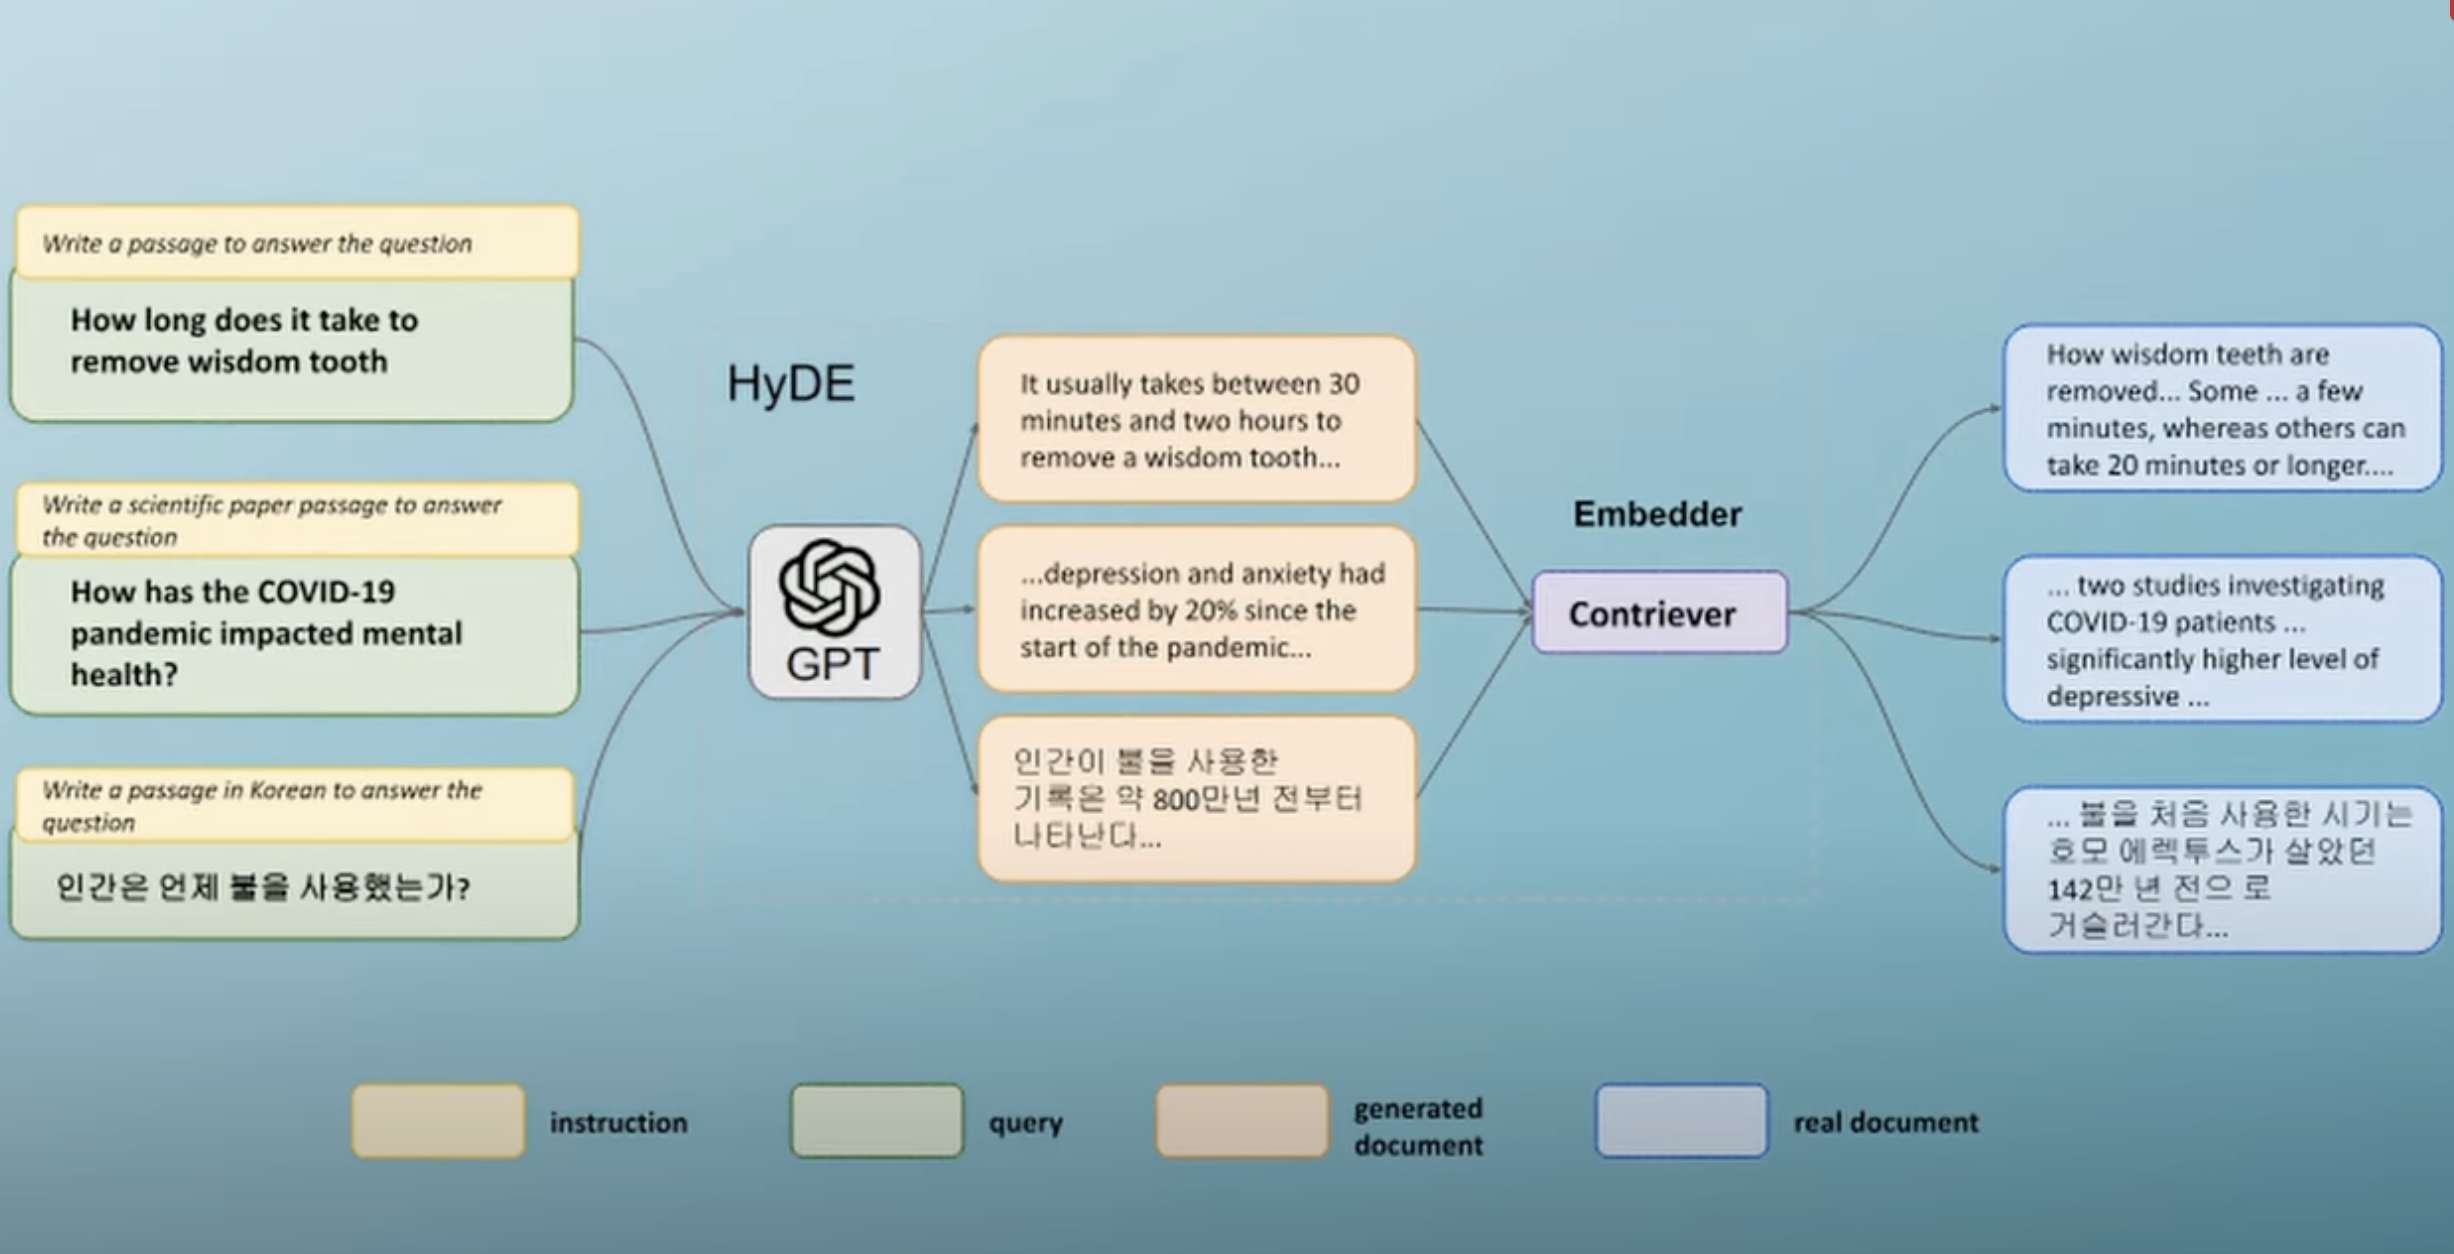

1. https://www.youtube.com/watch?v=v_BnBEubv58&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY&index=5
2. https://colab.research.google.com/drive/1ncrpizJUITFaZ2E7P3ZV9mpNOOds7TMU?usp=sharing
3. https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/MultiQueryRetriever/

## 6. Rag Fusion

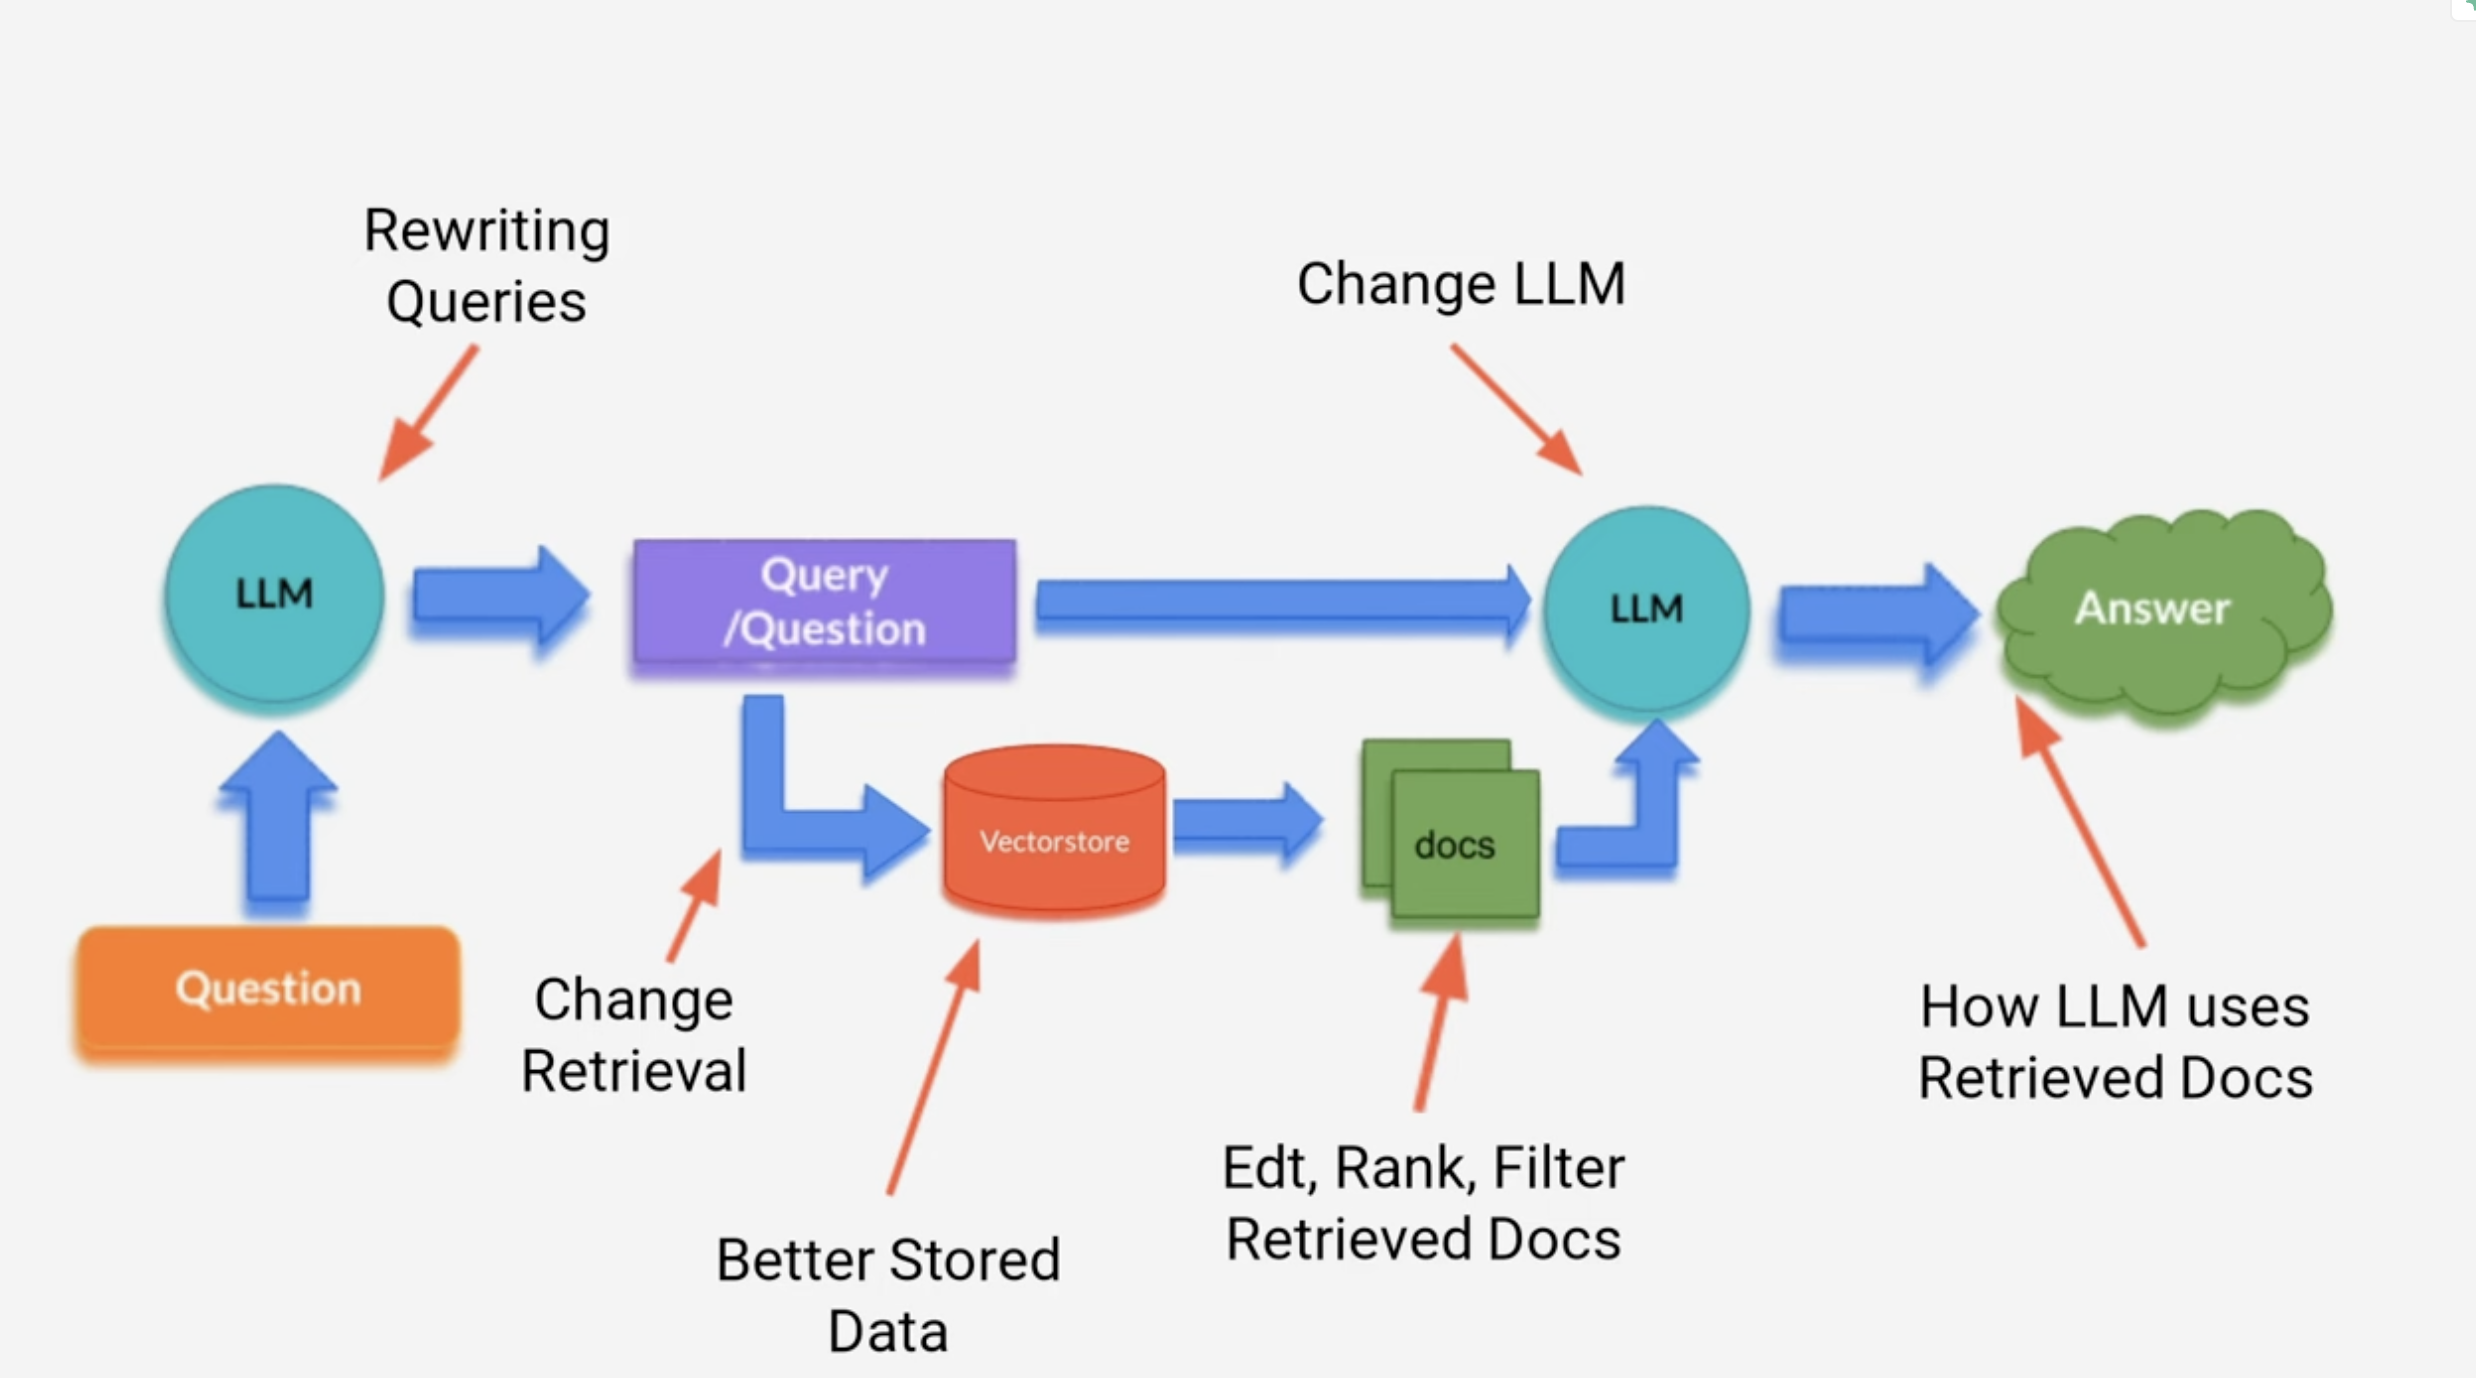

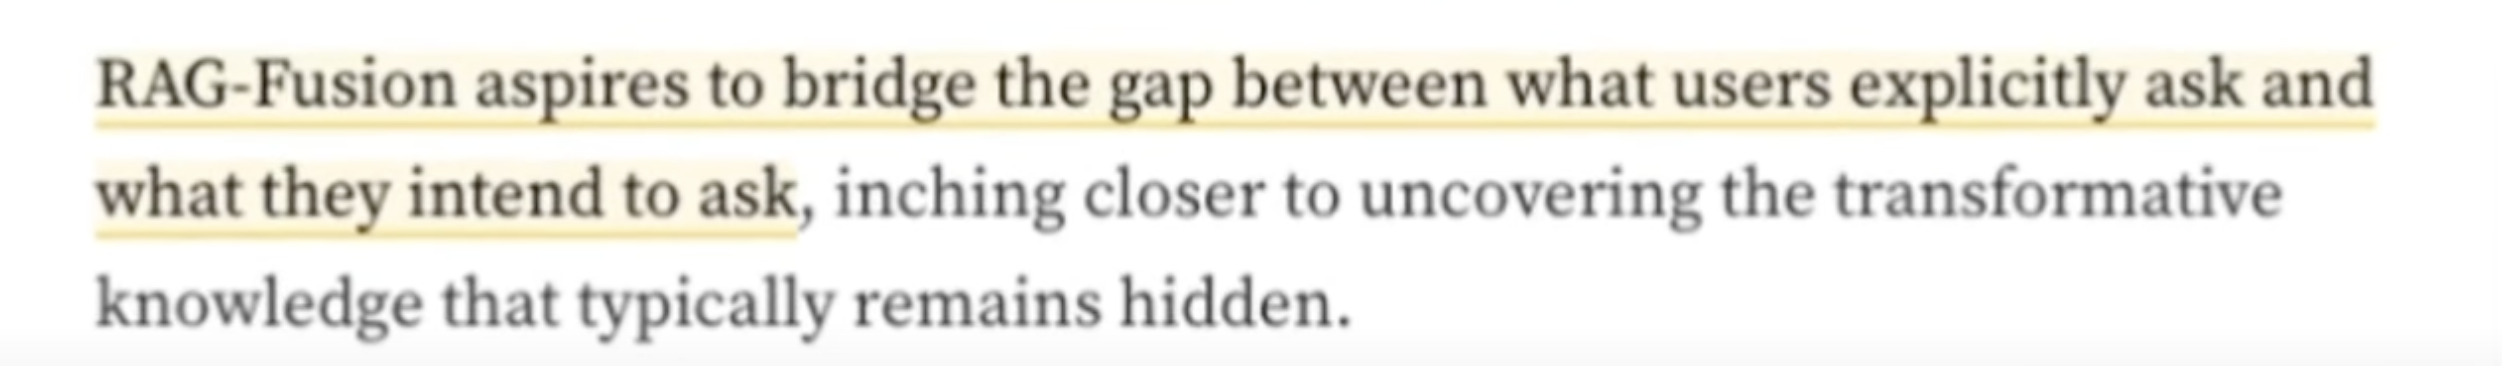

`Resources`

1. https://www.youtube.com/watch?v=GchC5WxeXGc&list=PL50UuMrag1lSx0P3yblli_A5zS8gLahcY&index=7
2. Colab: https://drp.li/PZG2t
3. Blog Post: https://towardsdatascience.com/forget...
4. Original Code: https://github.com/Raudaschl/rag-fusion


## Other Ideas

#### Leveraging Summaries for Enhanced Retrieval

Another strategy involves indexing documents based on their summaries.
Summarizing complex documents, especially those containing data like tables, and indexing these summaries can significantly enhance the accuracy of data retrieval.
We need to store a reference to the original document when indexing. So, we can use it as part of the context of the prompt.
This approach is particularly useful when dealing with non-textual data, ensuring the queries align more closely with the semantic essence of the document.


## Enriching Metadata

1. https://www.youtube.com/watch?v=TXHIIBohE6w
2. 2nd response has many links
https://community.pinecone.io/t/does-having-metadata-improve-semantic-search-by-default/3367/2
3. https://www.google.com/search?q=metadata+for+rag&rlz=1C5CHFA_enIN1090IN1090&oq=metadata+for+rag&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyDQgBEAAYhgMYgAQYigUyDQgCEAAYhgMYgAQYigUyDQgDEAAYhgMYgAQYigUyDQgEEAAYhgMYgAQYigUyDQgFEAAYhgMYgAQYigUyCggGEAAYgAQYogQyCggHEAAYgAQYogQyCggIEAAYgAQYogQyCggJEAAYgAQYogTSAQg3MTMxajBqNKgCALACAQ&sourceid=chrome&ie=UTF-8#fpstate=ive&ip=1&vld=cid:46544a07,vid:qcn7YAJfCeE,st:0 

## Start

1. Use Langchain Document. Add metadata like title - ask chat gpt to create one , summary , keywords , chunk number , source
2. Check basic rag using gcp https://cloud.google.com/blog/products/ai-machine-learning/rag-with-bigquery-and-langchain-in-cloud
3. Document loaders langchain - https://medium.com/@varsha.rainer/document-loaders-in-langchain-7c2db9851123
4. Metadata Creation - https://python.langchain.com/v0.2/docs/integrations/document_transformers/openai_metadata_tagger/
5. https://freedium.cfd/https://levelup.gitconnected.com/contextual-metadata-filtering-rag-cmf-rag-9a94b39b2b7e

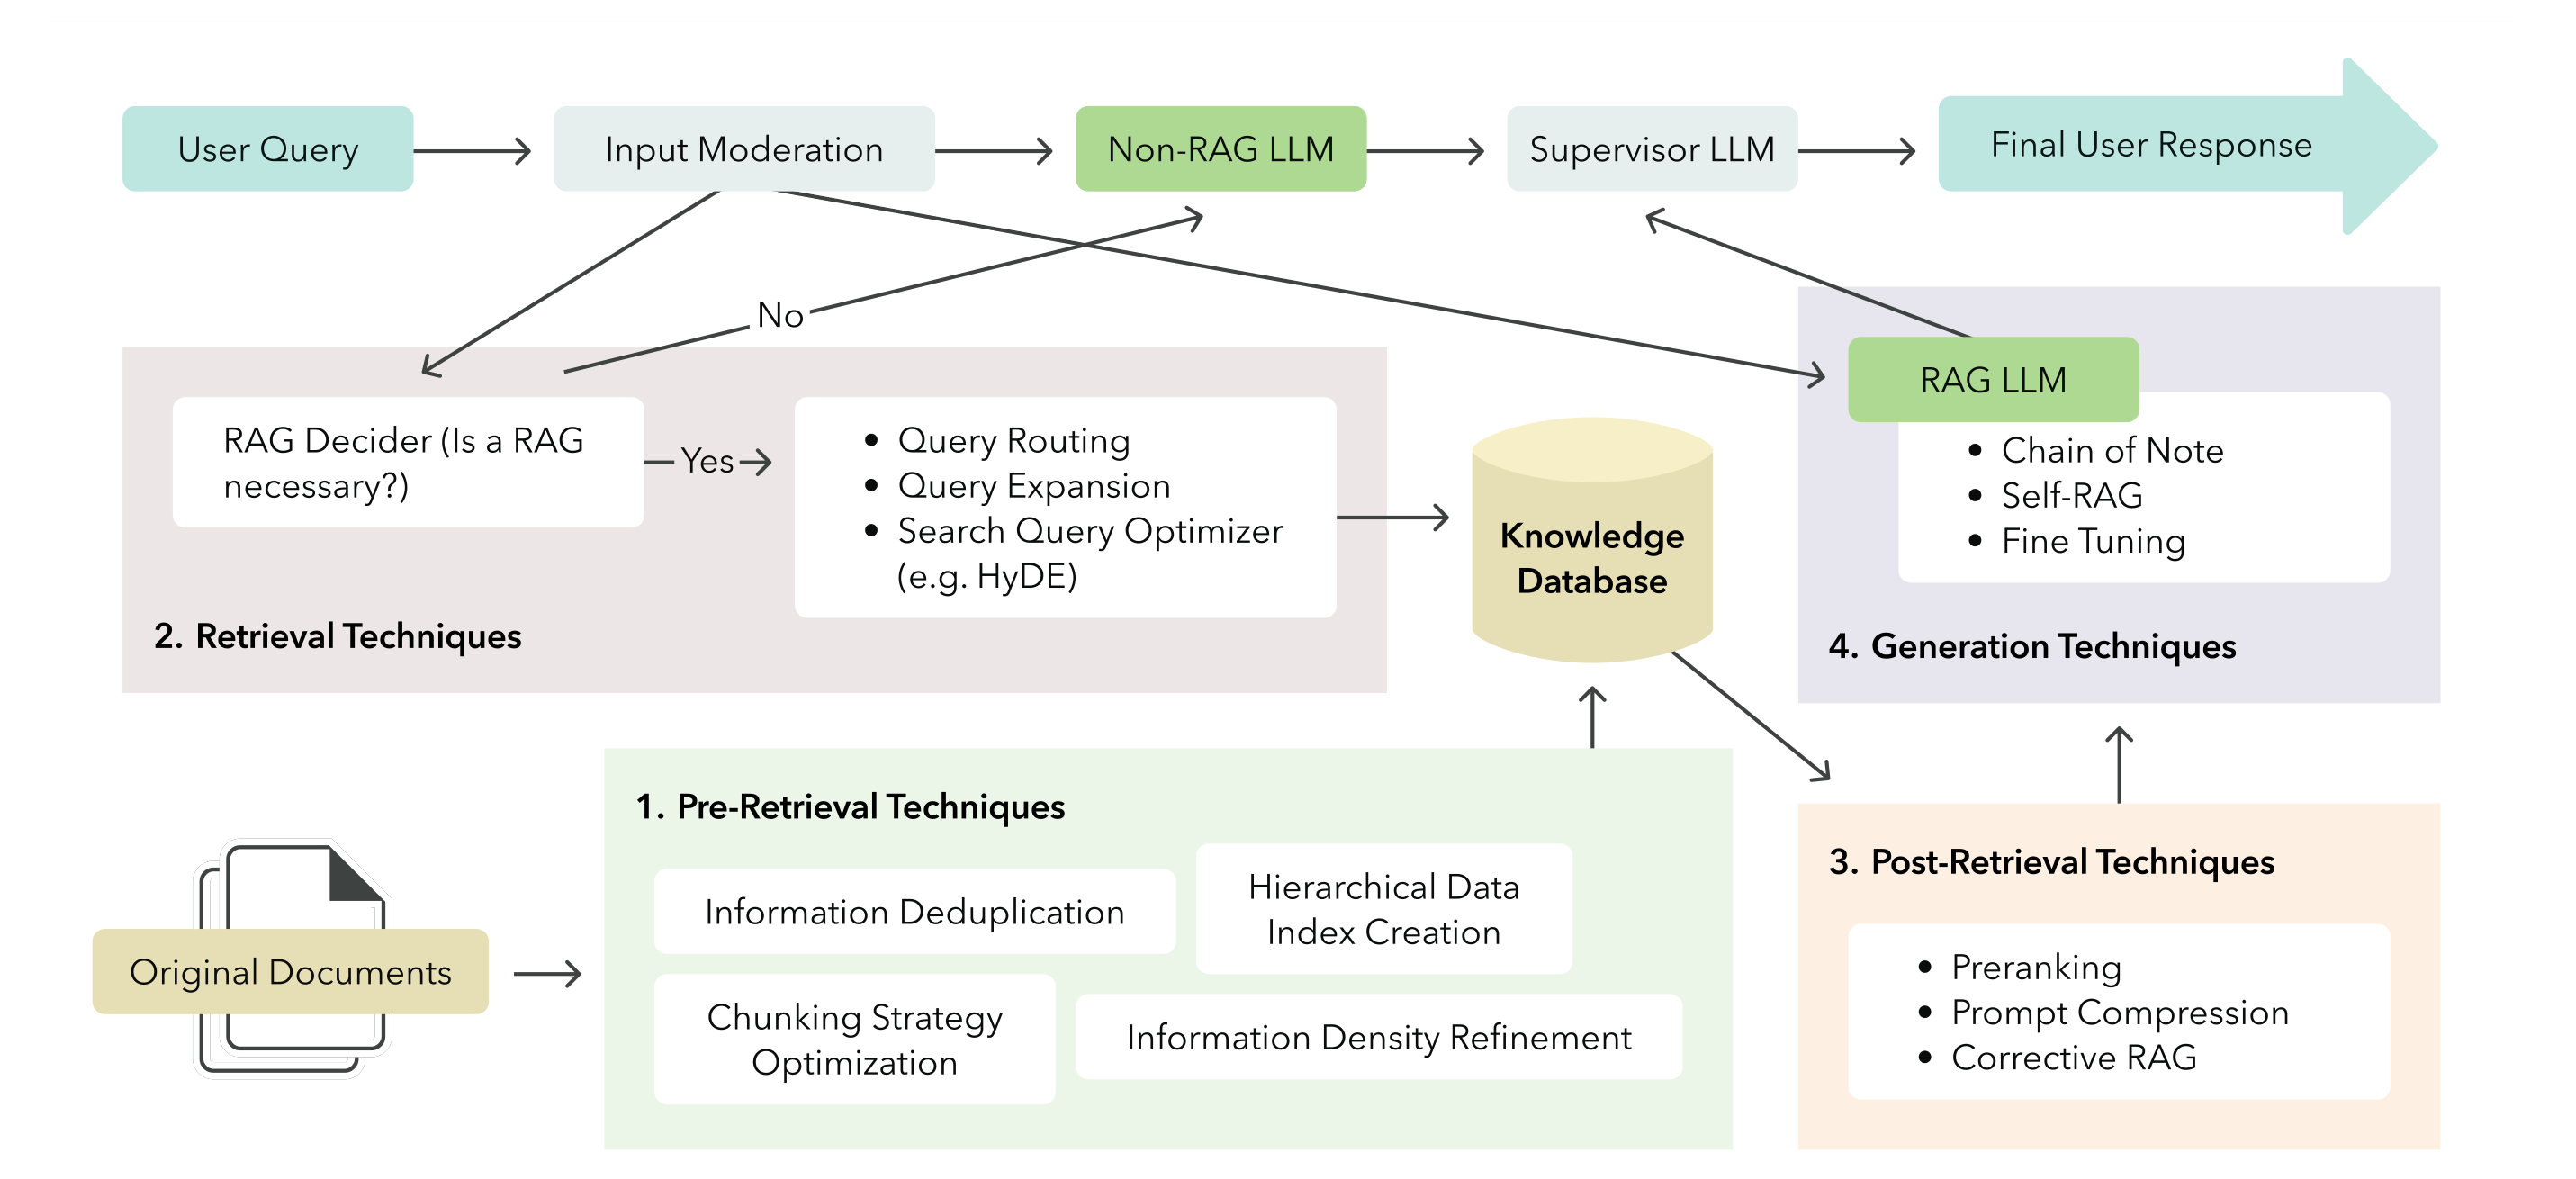